# Data Cleaning : 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error


# Importing the dataset
dataset = pd.read_csv('dataset/diabetes.csv')

In [3]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
'''counting how many  0s are there in each feature '''

for i in dataset.columns:
    print(i, ":\t", len(dataset[dataset[i]==0].index))

Pregnancies :	 111
Glucose :	 5
BloodPressure :	 35
SkinThickness :	 227
Insulin :	 374
BMI :	 11
DiabetesPedigreeFunction :	 0
Age :	 0
Outcome :	 500


In [7]:
'''replace some key features 0 values with NaN'''

dataset['Glucose'].replace(0, np.nan, inplace=True)
dataset['BloodPressure'].replace(0, np.nan, inplace=True)
dataset['SkinThickness'].replace(0, np.nan, inplace=True)
dataset['Insulin'].replace(0, np.nan, inplace=True)
dataset['BMI'].replace(0, np.nan, inplace=True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
'''replace NaN values with the mean value of the feature '''

dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace=True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(), inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].mean(), inplace=True)
dataset['BMI'].fillna(dataset['BMI'].mean(), inplace=True)
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [10]:
'''Describing Dataset to understand the the presence of outliers'''
dataset.describe(percentiles=[0.25,0.50,0.75,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


=> From the above description of the dataset, we see that there are some outliers present as there is a 
huge  difference between the 75% and 99%, so we will remove some outliers

In [11]:
print('dataset shape before removing outliers : ')
print(dataset.shape)

dataset shape before removing outliers : 
(768, 9)


In [12]:
'''Removing outliers from all features'''

Q1 = dataset.quantile(0.10)
Q3 = dataset.quantile(0.90)
IQR = Q3 - Q1

dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)] 
print('dataset shape after removing outliers : ')
print(dataset.shape)

dataset shape after removing outliers : 
(747, 9)


In [13]:
'''Describing dataset again to check if outliers removed successfully or not'''
dataset.describe(percentiles=[0.25,0.50,0.75,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.875502,120.423606,72.419252,28.849834,146.244294,32.295625,0.462150,33.182062,0.338688
std,3.380162,29.701152,12.077689,8.275379,57.631471,6.792201,0.305768,11.689300,0.473581
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.400000,0.243500,24.000000,0.000000
50%,3.000000,116.000000,72.405184,29.153420,155.548223,32.300000,0.368000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,155.548223,36.350000,0.613500,40.500000,1.000000
99%,13.000000,194.540000,106.000000,50.000000,338.780000,49.654000,1.451800,67.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,415.000000,67.100000,1.893000,81.000000,1.000000


# Visualizing some features 

In [14]:
print(dataset.groupby('Outcome').size())

Outcome
0    494
1    253
dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

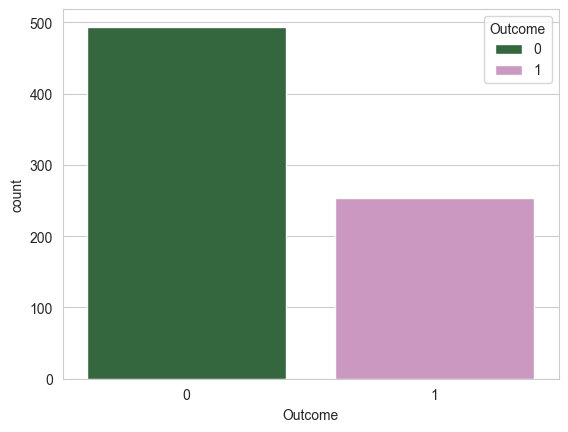

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',hue='Outcome',data=dataset,palette='cubehelix')

There are 494 patients with no Diabetes and 253 patients with Diabetes.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

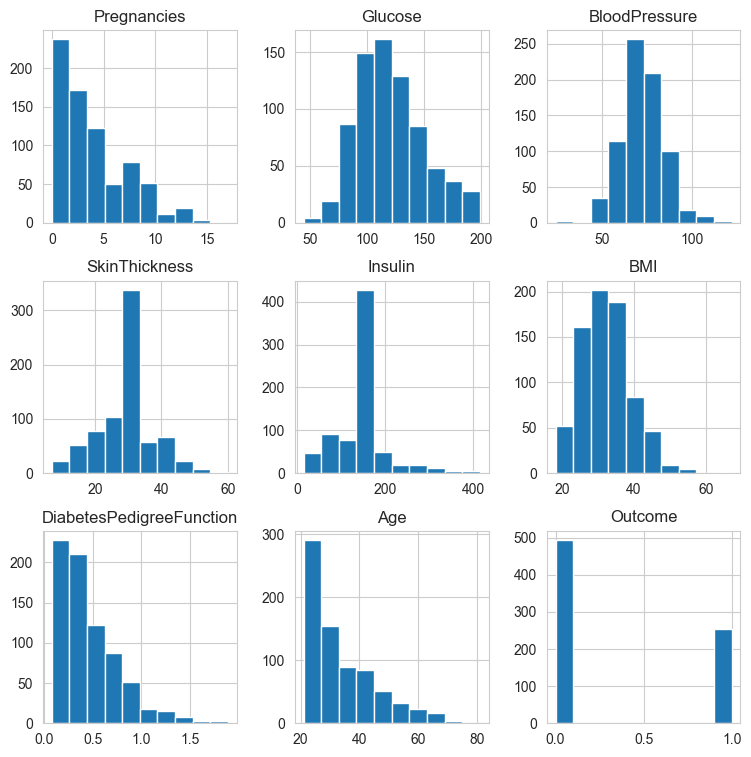

In [16]:
dataset.hist(figsize = (9, 9))

# Correlations of each feature and  heat map

<Axes: >

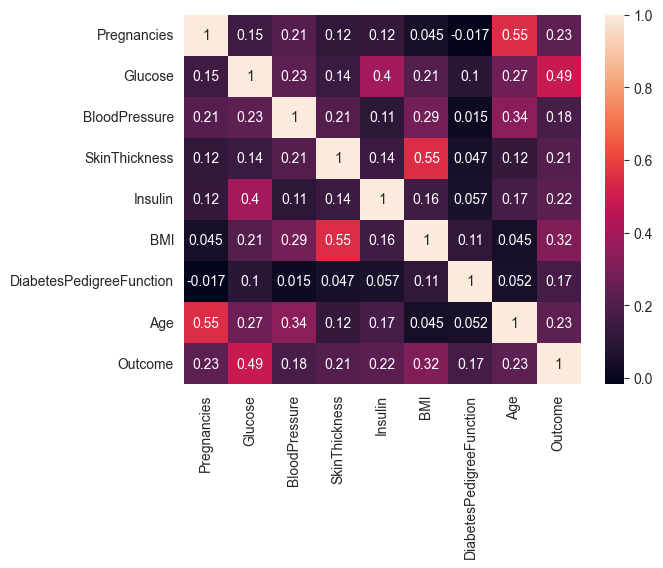

In [17]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

# Cross Validation :

In [18]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5-fold cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='accuracy')
print("SVM Accuracy: {:.3f} ".format(np.mean(svm_scores)))

# K-NN
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_scores = cross_val_score(knn_classifier, X_scaled, y, cv=cv, scoring='accuracy')
print("K-NN Accuracy: {:.3f} ".format(np.mean(knn_scores)))

# Logistic Regression
logistic_regression_classifier = LogisticRegression(random_state=42)
log_reg_scores = cross_val_score(logistic_regression_classifier, X_scaled, y, cv=cv, scoring='accuracy')
print("Logistic Regression Accuracy: {:.3f} ".format(np.mean(log_reg_scores)))

# Decision Tree
tree_classifier = DecisionTreeClassifier(max_depth=6, max_features=4, min_samples_split=5, random_state=42)
tree_scores = cross_val_score(tree_classifier, X, y, cv=cv, scoring='accuracy')
print("Decision Tree Accuracy: {:.3f} ".format(np.mean(tree_scores)))

# Naive Bayes (Gaussian)
naive_bayes_classifier = GaussianNB()
nb_scores = cross_val_score(naive_bayes_classifier, X, y, cv=cv, scoring='accuracy')
print("Naive Bayes Accuracy: {:.3f} ".format(np.mean(nb_scores)))


SVM Accuracy: 0.763 
K-NN Accuracy: 0.762 
Logistic Regression Accuracy: 0.778 
Decision Tree Accuracy: 0.726 
Naive Bayes Accuracy: 0.754 


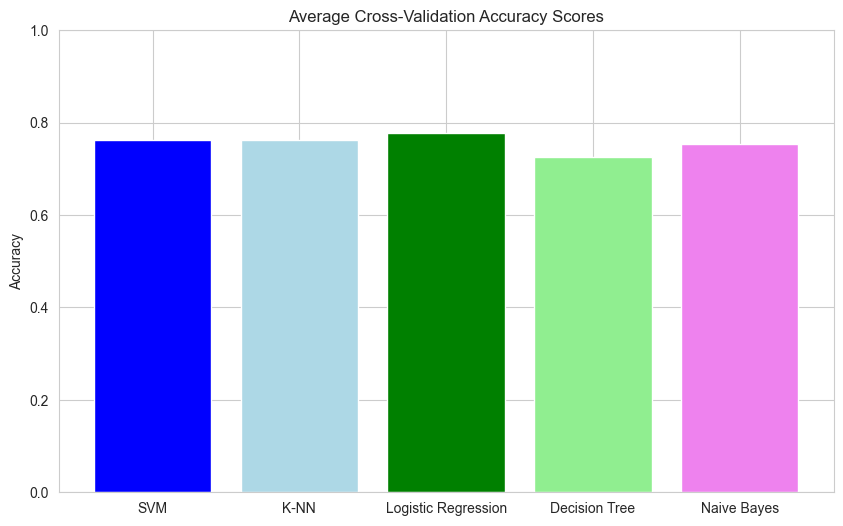

In [20]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Feature Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5-fold cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize classifiers
classifiers = [
    ('SVM', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)),
    ('K-NN', KNeighborsClassifier(n_neighbors=10)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=6, max_features=4, min_samples_split=5, random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Collect scores for each classifier
avg_scores = {}
for name, classifier in classifiers:
    classifier_scores = cross_val_score(classifier, X_scaled if name != 'Naive Bayes' else X, y, cv=cv, scoring='accuracy')
    avg_scores[name] = np.mean(classifier_scores)

# Create a bar chart to visualize the average accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(avg_scores.keys(), avg_scores.values(), color=['blue', 'lightblue', 'green', 'lightgreen', 'violet'])
plt.title('Average Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0-1 for accuracy
plt.show()


# KNN 

In [21]:
'''Tuning KNN Model with K from 1 to 15 to get the best value of K'''

neighbors = np.arange(1,15)
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy[i] = knn.score(X_train, y_train)
    testing_accuracy[i] = knn.score(X_test, y_test)

In [22]:
''' Training and Testing data shape after giving k the values '''

print("Training KNN for K=1 to 15 :", training_accuracy.shape, "\n")
print("Testing KNN for K=1 to 15 : ", testing_accuracy.shape, "\n")

Training KNN for K=1 to 15 : (14,) 

Testing KNN for K=1 to 15 :  (14,) 



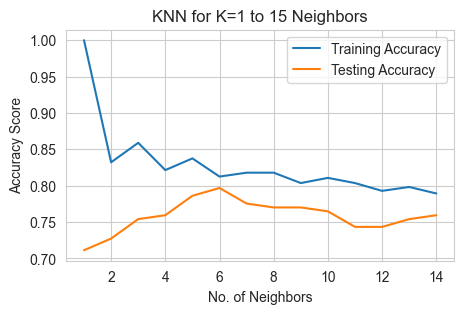

In [23]:
'''Graphical representation of K=1 to 15 Neighbors w.r.t. their Accuracy Score'''

plt.figure(figsize=(5, 3))
plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, testing_accuracy, label="Testing Accuracy")
plt.legend(loc=0)
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("KNN for K=1 to 15 Neighbors")
plt.show()

there is a peak at k = 6 as well, the larger peak at k = 10 suggests that the model is more accurate at that point.

It's worth noting that sometimes a higher value of k can lead to overfitting

In [24]:
'''Choosing k=10 based on the previous result '''
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
knnClassifier = KNeighborsClassifier(n_neighbors=10)  # Fixed number of neighbors
knnClassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knnClassifier.predict(X_test)

y_pred_KNN=y_pred
y_test_KNN=y_test

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy on training and test set
print('Accuracy on training set: {:.2f}'.format(knnClassifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Print precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

# Print true negative rate (TNR)
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('True Negative Rate (TNR): {:.2f}'.format(tnr))

# Print mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.2f}'.format(mae))


Accuracy on training set: 0.81
Accuracy on test set: 0.76
Confusion Matrix:
[[112  18]
 [ 26  31]]
Precision: 0.63
Recall: 0.54
F1 Score: 0.58
True Negative Rate (TNR): 0.86
Mean Absolute Error: 0.24


# Decision Tree 

In [25]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree to the Training set with fixed hyperparameters
tree = DecisionTreeClassifier(max_depth=6, max_features=4, min_samples_split=5, random_state=42)
tree.fit(X_train, y_train)

# Predicting the Test set results
y_pred = tree.predict(X_test)

y_pred_DT=y_pred
y_test_DT=y_test

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy on training and test set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Print precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

# Print true negative rate (TNR)
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('True Negative Rate (TNR): {:.2f}'.format(tnr))

# Print mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.2f}'.format(mae))


Accuracy on training set: 0.843
Accuracy on test set: 0.765
Confusion Matrix:
[[117  13]
 [ 31  26]]
Precision: 0.67
Recall: 0.46
F1 Score: 0.54
True Negative Rate (TNR): 0.90
Mean Absolute Error: 0.24


# SVM

In [26]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set with fixed hyperparameters
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

y_pred_SVM=y_pred
y_test_SVM=y_test

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy on training and test set
print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train, svm_classifier.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred)))

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Print precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))

# Print true negative rate (TNR)
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('True Negative Rate (TNR): {:.3f}'.format(tnr))

# Print mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.3f}'.format(mae))


Accuracy on training set: 0.821
Accuracy on test set: 0.765
Confusion Matrix:
[[112  18]
 [ 26  31]]
Precision: 0.633
Recall: 0.544
F1 Score: 0.585
True Negative Rate (TNR): 0.862
Mean Absolute Error: 0.235


# Logistic Regression

In [27]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Print accuracy on training and test set
print("Accuracy on training set: {:.3f}".format(logistic_regression_classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logistic_regression_classifier.score(X_test, y_test)))

# Predicting the Test set results
y_pred = logistic_regression_classifier.predict(X_test)

y_pred_LR=y_pred
y_test_LR=y_test

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Print precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))

# Print true negative rate (TNR)
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('True Negative Rate (TNR): {:.3f}'.format(tnr))

# Print mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.3f}'.format(mae))


Accuracy on training set: 0.773
Accuracy on test set: 0.775
Confusion Matrix:
[[117  13]
 [ 29  28]]
Precision: 0.683
Recall: 0.491
F1 Score: 0.571
True Negative Rate (TNR): 0.900
Mean Absolute Error: 0.225


# Gaussian Naive Bayes 

In [28]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling (Naive Bayes is not sensitive to feature scaling, but it's good practice)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Gaussian Naive Bayes to the Training set
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Print accuracy on training and test set
train_accuracy = naive_bayes_classifier.score(X_train, y_train)
test_accuracy = naive_bayes_classifier.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))

# Predicting the Test set results
y_pred = naive_bayes_classifier.predict(X_test)

y_pred_NB=y_pred
y_test_NB=y_test

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Print precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))

# Print true negative rate (TNR)
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('True Negative Rate (TNR): {:.3f}'.format(tnr))

# Print mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.3f}'.format(mae))


Accuracy on training set: 0.764
Accuracy on test set: 0.727
Confusion Matrix:
[[103  27]
 [ 24  33]]
Precision: 0.550
Recall: 0.579
F1 Score: 0.564
True Negative Rate (TNR): 0.792
Mean Absolute Error: 0.273


# Visualization of comparison : 

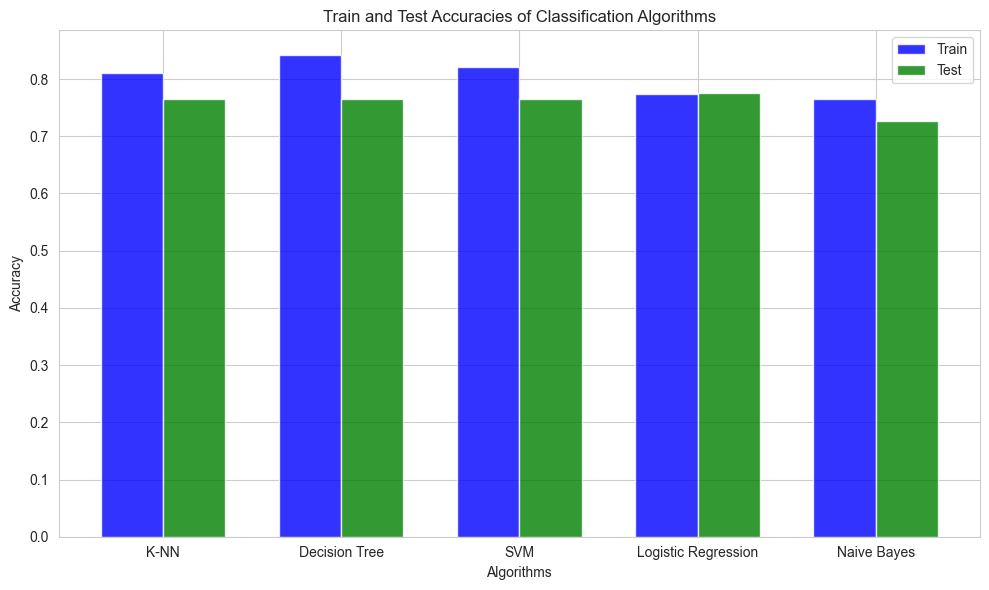

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values
accuracies_train = [knnClassifier.score(X_train, y_train),
                    tree.score(X_train, y_train),
                    svm_classifier.score(X_train, y_train),
                    logistic_regression_classifier.score(X_train, y_train),
                    train_accuracy]

accuracies_test = [knnClassifier.score(X_test, y_test),
                   tree.score(X_test, y_test),
                   accuracy_score(y_test, svm_classifier.predict(X_test)),
                   logistic_regression_classifier.score(X_test, y_test),
                   test_accuracy]

# Algorithm names
algorithms = ['K-NN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

index = np.arange(len(algorithms))

rects1 = plt.bar(index, accuracies_train, bar_width, alpha=opacity, color='b', label='Train')
rects2 = plt.bar(index + bar_width, accuracies_test, bar_width, alpha=opacity, color='g', label='Test')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Classification Algorithms')
plt.xticks(index + bar_width / 2, algorithms)
plt.legend()

plt.tight_layout()
plt.show()


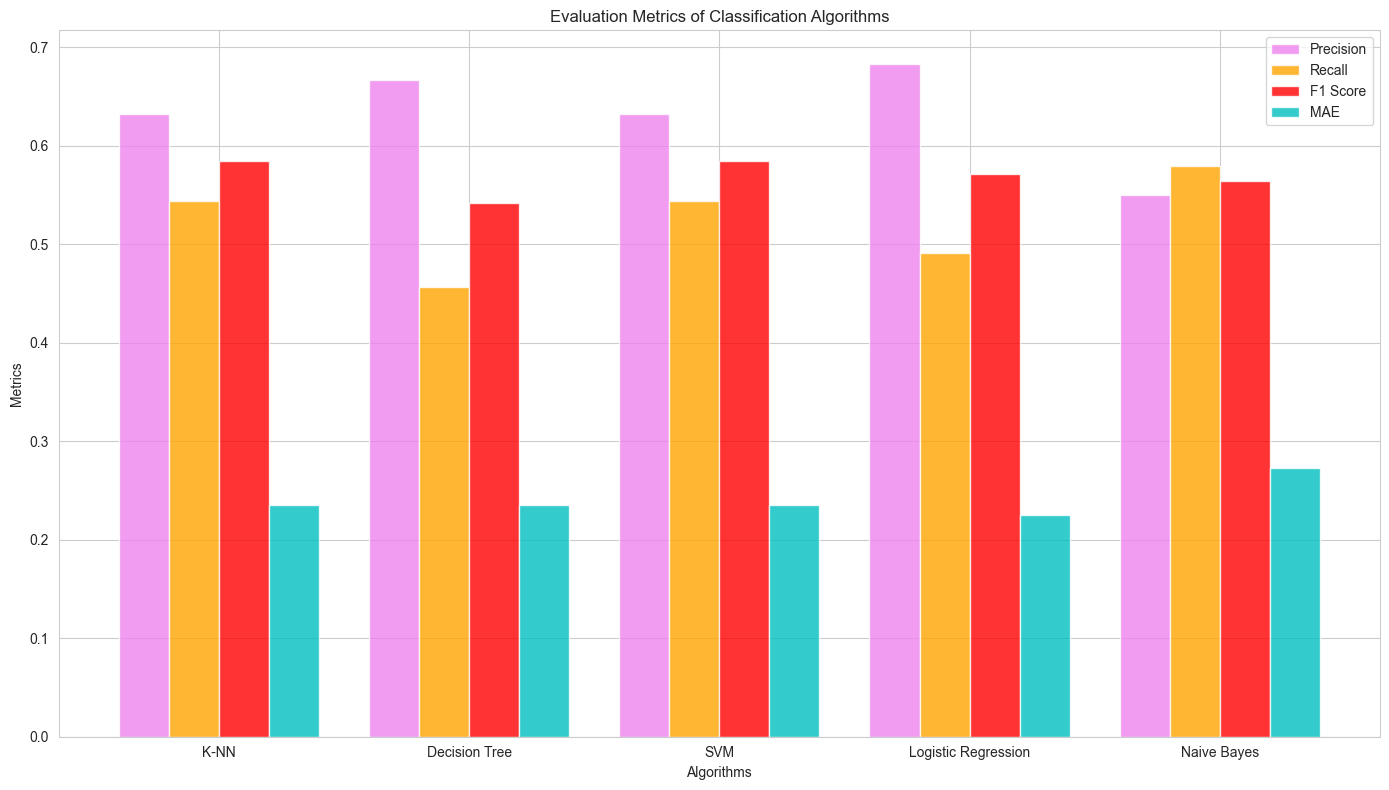

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metric values
precision_values = [precision_score(y_test_KNN, y_pred_KNN),
                    precision_score(y_test_DT, y_pred_DT),
                    precision_score(y_test_SVM, y_pred_SVM),
                    precision_score(y_test_LR, y_pred_LR),
                    precision_score(y_test_NB, y_pred_NB)]

recall_values = [recall_score(y_test_KNN, y_pred_KNN),
                 recall_score(y_test_DT, y_pred_DT),
                 recall_score(y_test_SVM, y_pred_SVM),
                 recall_score(y_test_LR, y_pred_LR),
                  recall_score(y_test_NB, y_pred_NB)]

f1_values = [f1_score(y_test_KNN, y_pred_KNN),
              f1_score(y_test_DT, y_pred_DT),
              f1_score(y_test_SVM, y_pred_SVM),
              f1_score(y_test_LR, y_pred_LR),
              f1_score(y_test_NB, y_pred_NB)]

mae_values = [mean_absolute_error(y_test_KNN, y_pred_KNN),
              mean_absolute_error(y_test_DT, y_pred_DT),
               mean_absolute_error(y_test_SVM, y_pred_SVM),
              mean_absolute_error(y_test_LR, y_pred_LR),
               mean_absolute_error(y_test_NB, y_pred_NB)]

# Algorithm names
algorithms = ['K-NN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes']

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
opacity = 0.8

index = np.arange(len(algorithms))

rects1 = plt.bar(index, precision_values, bar_width, alpha=opacity, color='violet', label='Precision')
rects2 = plt.bar(index + bar_width, recall_values, bar_width, alpha=opacity, color='orange', label='Recall')
rects3 = plt.bar(index + 2 * bar_width, f1_values, bar_width, alpha=opacity, color='r', label='F1 Score')
rects4 = plt.bar(index + 3 * bar_width, mae_values, bar_width, alpha=opacity, color='c', label='MAE')

plt.xlabel('Algorithms')
plt.ylabel('Metrics')
plt.title('Evaluation Metrics of Classification Algorithms')
plt.xticks(index + 1.5 * bar_width, algorithms)
plt.legend()

plt.tight_layout()
plt.show()


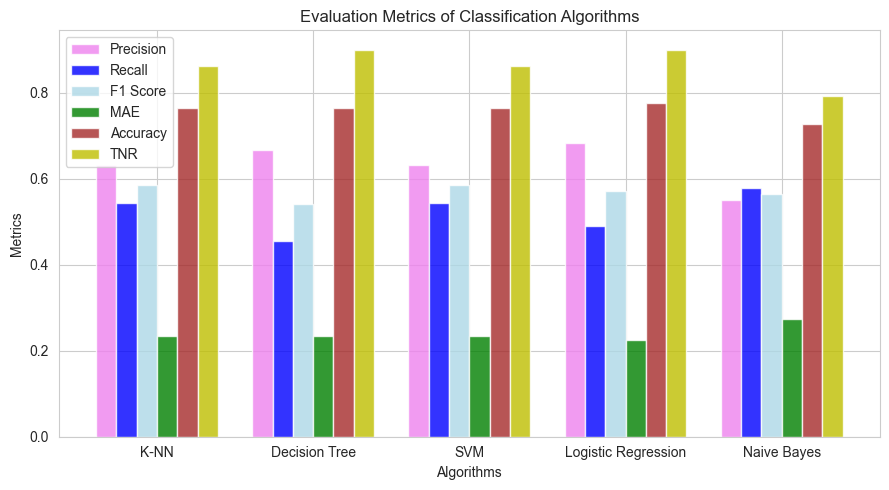

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_tnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tnr = tn / (tn + fp)
    return tnr


# Evaluation metric values
precision_values = [precision_score(y_test_KNN, y_pred_KNN),
                    precision_score(y_test_DT, y_pred_DT),
                    precision_score(y_test_SVM, y_pred_SVM),
                    precision_score(y_test_LR, y_pred_LR),
                    precision_score(y_test_NB, y_pred_NB)]

recall_values = [recall_score(y_test_KNN, y_pred_KNN),
                 recall_score(y_test_DT, y_pred_DT),
                 recall_score(y_test_SVM, y_pred_SVM),
                 recall_score(y_test_LR, y_pred_LR),
                  recall_score(y_test_NB, y_pred_NB)]

f1_values = [f1_score(y_test_KNN, y_pred_KNN),
              f1_score(y_test_DT, y_pred_DT),
              f1_score(y_test_SVM, y_pred_SVM),
              f1_score(y_test_LR, y_pred_LR),
              f1_score(y_test_NB, y_pred_NB)]

mae_values = [mean_absolute_error(y_test_KNN, y_pred_KNN),
              mean_absolute_error(y_test_DT, y_pred_DT),
               mean_absolute_error(y_test_SVM, y_pred_SVM),
              mean_absolute_error(y_test_LR, y_pred_LR),
               mean_absolute_error(y_test_NB, y_pred_NB)]
accuracy_values = [knnClassifier.score(X_test, y_test),
                   tree.score(X_test, y_test),
                   accuracy_score(y_test, svm_classifier.predict(X_test)),
                   logistic_regression_classifier.score(X_test, y_test),
                   test_accuracy]

tnr_values = [calculate_tnr(y_test_KNN, y_pred_KNN),
              calculate_tnr(y_test_DT, y_pred_DT),
              calculate_tnr(y_test_SVM, y_pred_SVM),
              calculate_tnr(y_test_LR, y_pred_LR),
              calculate_tnr(y_test_NB, y_pred_NB)]

# Algorithm names
algorithms = ['K-NN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes']

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
bar_width = 0.13
opacity = 0.8

index = np.arange(len(algorithms))

rects1 = plt.bar(index, precision_values, bar_width, alpha=opacity, color='violet', label='Precision')
rects2 = plt.bar(index + bar_width, recall_values, bar_width, alpha=opacity, color='blue', label='Recall')
rects3 = plt.bar(index + 2 * bar_width, f1_values, bar_width, alpha=opacity, color='lightblue', label='F1 Score')
rects4 = plt.bar(index + 3 * bar_width, mae_values, bar_width, alpha=opacity, color='green', label='MAE')
rects5 = plt.bar(index + 4 * bar_width, accuracy_values, bar_width, alpha=opacity, color='brown', label='Accuracy')
rects6 = plt.bar(index + 5 * bar_width, tnr_values, bar_width, alpha=opacity, color='y', label='TNR')


plt.xlabel('Algorithms')
plt.ylabel('Metrics')
plt.title('Evaluation Metrics of Classification Algorithms')
plt.xticks(index + 2.5 * bar_width, algorithms)
plt.legend()

plt.tight_layout()
plt.show()
